### OpenCV read Darknet

In [121]:
import cv2
import numpy as np
net = cv2.dnn.readNetFromDarknet("yolov3.cfg","yolov3_1200.weights")

In [122]:
layer_names = net.getLayerNames()

In [123]:
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

### obj.names

In [124]:
classes = [line.strip() for line in open("mask/obj.names")]
colors = [(0,0,255),(255,0,0),(0,255,0)]

### test picture

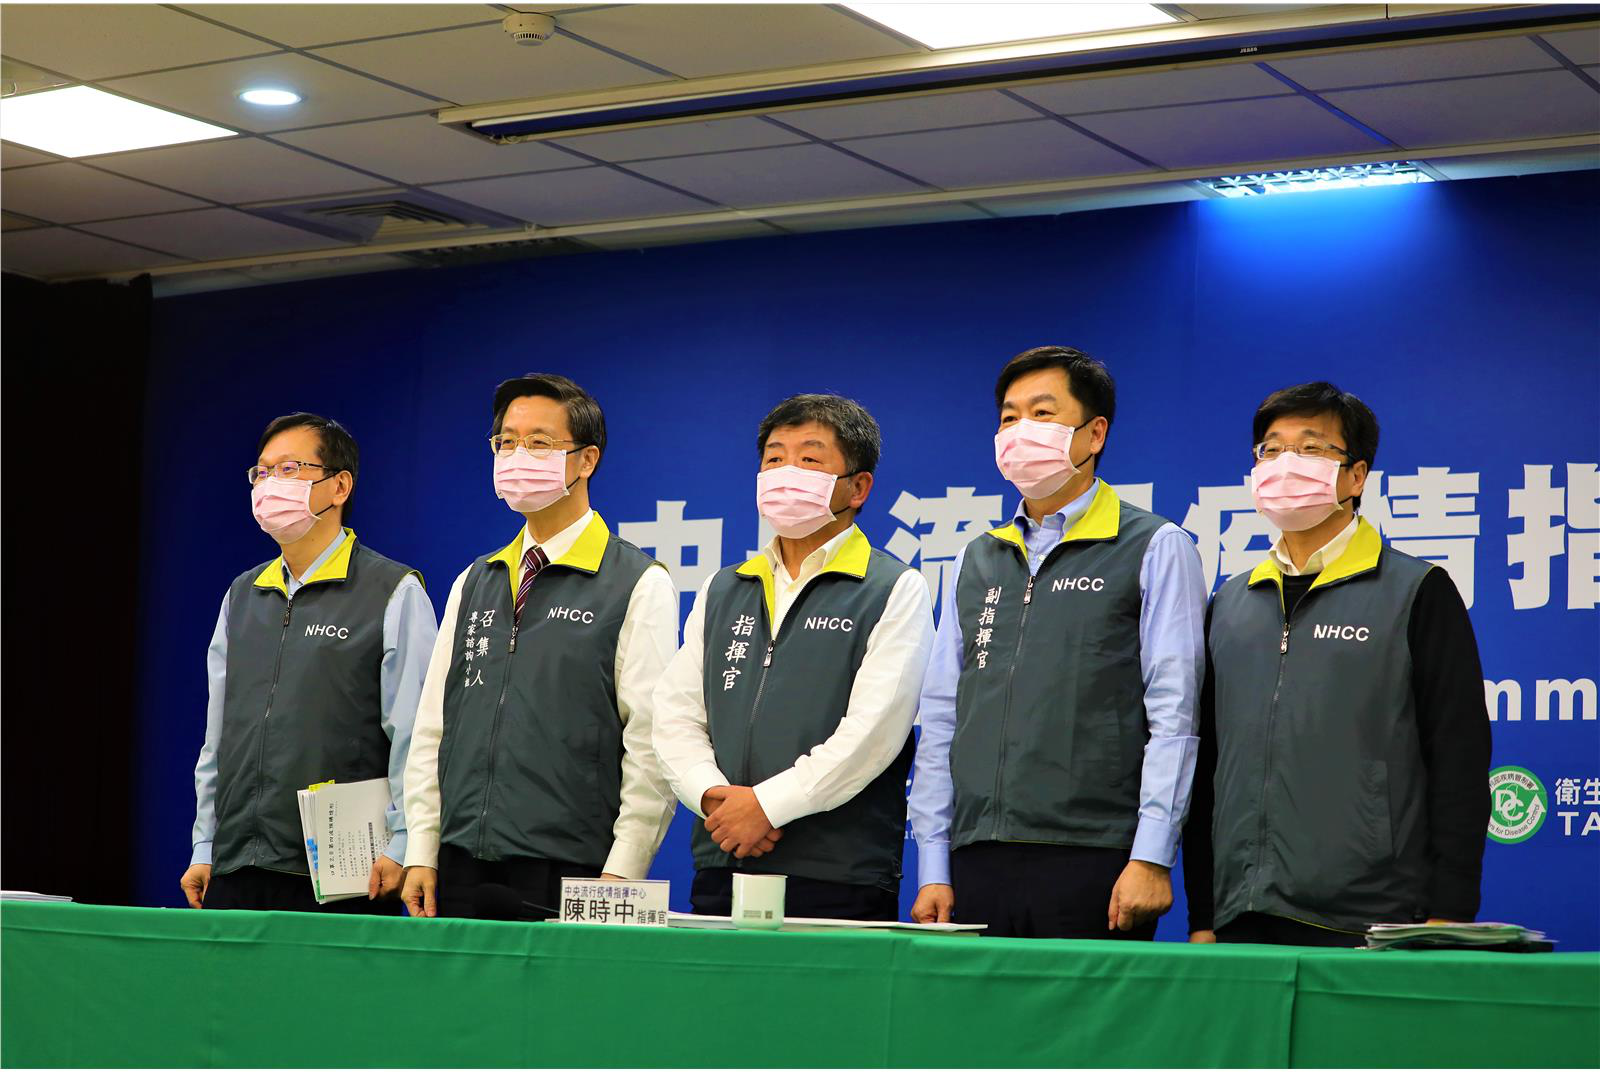

In [125]:
from PIL import Image
Image.open('test.jpg')

In [126]:
img = cv2.imread("test.jpg")
img.shape

(1072, 1600, 3)

### YOLOv3 detect

In [127]:
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape 
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [128]:
print(len(outs))
print(outs[0].shape)

3
(507, 8)


### get output xy

In [112]:
%%html
<img src='https://miro.medium.com/max/1200/0*3A8U0Hm5IKmRa6hu.png' width="500px" />

In [129]:
outs[0][0]

array([5.3048842e-02, 4.3436483e-02, 1.6118297e-01, 1.8414018e-01,
       4.4370470e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
      dtype=float32)

In [130]:
class_ids = []
confidences = []
boxes = []
    
for out in outs:
    for detection in out:
        # first 5 are Box Co-ordinates and score(object)
        tx, ty, tw, th, confidence = detection[0:5]
        # 678 are class scores
        scores = detection[5:]
        # choose highest class score
        class_id = np.argmax(scores)  
        if confidence > 0.3: 
            # get object center and width height
            center_x = int(tx * width)
            center_y = int(ty * height)
            w = int(tw * width)
            h = int(th * height)            
            # get x y
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            #save object Co-ordinates ,confidences and class
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [131]:
len(boxes)

9

### non-maxima suppression
* remove overlapping box 

In [26]:
%%html
<img src='https://miro.medium.com/max/1200/1*6d_D0ySg-kOvfrzIRwHIiA.png' />

In [132]:
# bboxes, scores, score_threshold, nms_threshold
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.4)

### Frame the area

In [133]:
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(len(boxes)):
    if i in indexes:
        # in indexes,get x, y, w, h, label, color
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        # write rectangle and Text(good,bad,none)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 5), font, 0.7, color, 2,cv2.LINE_AA)

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


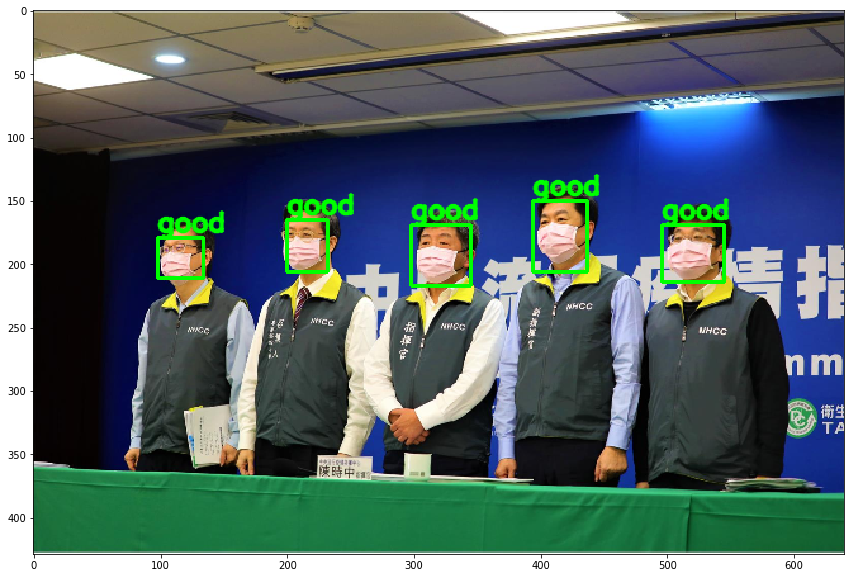

In [134]:
%pylab inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#BGR to RGB
plt.imshow(img_rgb)